In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Business Problem¶
An e-commerce company aims to separate its customers into different segments and implement a marketing strategy according to those segments.

In order to achieve this goal, purchasing actions of different customers will be clarified and customers will be grouped according to those actions

## Data import and cleaning

In [2]:
df = pd.read_csv('data.csv', encoding='latin1')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df= df.dropna(subset=['CustomerID'])

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.duplicated().sum()

5225

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


<Axes: >

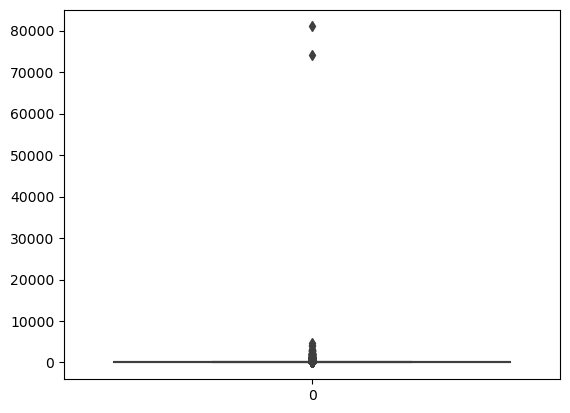

In [14]:
sns.boxplot(df.Quantity)

In [15]:
df = df[df.Quantity < 60000]

<Axes: >

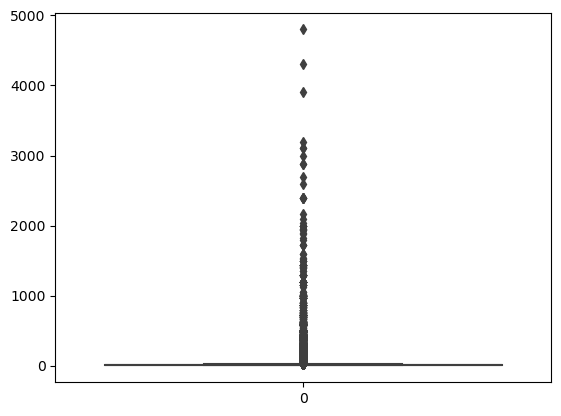

In [16]:
sns.boxplot(df.Quantity)

In [17]:
df[['CustomerID','Description','Country']].nunique()

CustomerID     4337
Description    3876
Country          37
dtype: int64

In [18]:
df_req = df[['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']]

In [19]:
df_req.CustomerID = df_req.CustomerID.round(0).astype('str')

C:\Users\Sharath\AppData\Local\Temp\ipykernel_7940\3054232015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_req.CustomerID = df_req.CustomerID.round(0).astype('str')


In [20]:
df_req.dtypes

InvoiceNo       object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
dtype: object

## Treating outliers in Quantity column

In [21]:
q1_qt = np.quantile(df_req.Quantity ,0.25)

In [22]:
q3_qt = np.quantile(df_req.Quantity ,0.75)

In [23]:
IQR_qt = q3_qt - q1_qt

In [24]:
upper_qt = q3_qt + 2*(IQR_qt)

In [25]:
df_req = df_req[df_req.Quantity < upper_qt]

In [26]:
df_req.shape

(368298, 5)

## Treating outliers in UnitPrice column

In [27]:
q1_up = np.quantile(df_req.UnitPrice, 0.25)

In [28]:
q3_up = np.quantile(df_req.UnitPrice, 0.75)

In [29]:
IQR_up = q3_up - q1_up 

In [30]:
lower_up = q1_up - 2*(IQR_up)

In [31]:
upper_up = q3_up + 2*(IQR_up)

In [32]:
df_req = df_req[(df_req.UnitPrice > 0) & (df_req.UnitPrice < upper_up)]

In [33]:
df_req.shape

(351366, 5)

In [34]:
df_req.InvoiceDate.value_counts()

InvoiceDate
14-11-2011 15:27    488
28-11-2011 15:54    469
05-12-2011 17:17    466
31-10-2011 14:09    399
21-09-2011 14:40    388
                   ... 
23-06-2011 09:56      1
04-08-2011 17:45      1
03-04-2011 11:45      1
04-08-2011 17:55      1
19-05-2011 12:09      1
Name: count, Length: 15937, dtype: int64

## Creating necessary columns

In [35]:
df_req['InvoiceDate'] = pd.to_datetime(df_req['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [36]:
df_req['Date'] = df_req['InvoiceDate'].dt.date

In [37]:
df_req['Total'] = df_req['Quantity'] * df_req['UnitPrice'] 

In [38]:
df_req.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Date,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,2010-12-01,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,2010-12-01,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,2010-12-01,20.34


## RFM

### (1) Recency

In [39]:
recent_date = df_req.Date.max() + pd.Timedelta(days=1)

In [40]:
print(recent_date)

2011-12-10


In [41]:
df_recency = df_req.groupby(['CustomerID'], as_index = False )['Date'].max()

In [42]:
df_recency.columns = ['CustomerID', 'Latest_order_date']

In [43]:
recent_date = pd.to_datetime('2011-12-09')

In [44]:
df_recency['Latest_order_date'] = pd.to_datetime(df_recency['Latest_order_date'], format='%Y-%m-%d')

In [45]:
df_recency['Recency'] = (recent_date - df_recency['Latest_order_date']).dt.days

In [46]:
df_recency.head()

,CustomerID,Latest_order_date,Recency
0,12347.0,2011-12-07,2
1,12348.0,2011-04-05,248
2,12349.0,2011-11-21,18
3,12350.0,2011-02-02,310
4,12352.0,2011-11-03,36


### (2) Frequency and Monetary

In [47]:
df_fr_mo =df_req.groupby('CustomerID',as_index=False).agg({'InvoiceNo': 'nunique','Total': 'sum'})

In [48]:
df_fr_mo.rename(columns={'InvoiceNo':'Frequency','Total':'Monetary'},inplace=True)

In [49]:
df_fr_mo.head()

,CustomerID,Frequency,Monetary
0,12347.0,7,3450.03
1,12348.0,3,90.20
2,12349.0,1,1197.15
3,12350.0,1,294.40
4,12352.0,7,1232.44


In [50]:
rfm = df_recency.merge(df_fr_mo, left_on = 'CustomerID' , right_on = 'CustomerID')

In [51]:
rfm = rfm.drop('Latest_order_date', axis =1)

In [52]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12347.0,2,7,3450.03
1,12348.0,248,3,90.20
2,12349.0,18,1,1197.15
3,12350.0,310,1,294.40
4,12352.0,36,7,1232.44


In [53]:
rfm.dtypes

CustomerID     object
Recency         int64
Frequency       int64
Monetary      float64
dtype: object

## RFM Quantiles

In [54]:
rfm = rfm.apply(pd.to_numeric, errors='ignore')

In [55]:
quantiles=rfm.quantile([0.25,0.50,0.75])

In [56]:
rfm = rfm.apply(pd.to_numeric, errors='coerce')

In [57]:
quantiles=quantiles.to_dict()

In [58]:
print(quantiles)

{'CustomerID': {0.25: 13809.5, 0.5: 15281.0, 0.75: 16768.5}, 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0}, 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 4.0}, 'Monetary': {0.25: 226.33, 0.5: 512.52, 0.75: 1242.9650000000001}}


In [59]:
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [60]:
rfm['R']=rfm['Recency'].apply(Rscoring,args=('Recency',quantiles))

In [61]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R
0,12347.0,2,7,3450.03,1
1,12348.0,248,3,90.20,4
2,12349.0,18,1,1197.15,2
3,12350.0,310,1,294.40,4
4,12352.0,36,7,1232.44,2


In [62]:
def FMscoring(x,p,d):
    if x <=d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [63]:
rfm['F']=rfm['Frequency'].apply(FMscoring,args=('Frequency',quantiles))
rfm['M']=rfm['Monetary'].apply(FMscoring,args=('Monetary',quantiles))

In [64]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12347.0,2,7,3450.03,1,1,1
1,12348.0,248,3,90.20,4,2,4
2,12349.0,18,1,1197.15,2,4,2
3,12350.0,310,1,294.40,4,4,3
4,12352.0,36,7,1232.44,2,1,2


## RFM segment & RFM score

In [65]:
rfm['RFMgroup'] = rfm.R.map(str)+rfm.M.map(str)+rfm.F.map(str)

In [66]:
rfm['RFM_score'] = rfm[['R','F','M']].sum(axis=1)

In [67]:
rfm.head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score
0,12347.0,2,7,3450.03,1,1,1,111,3
1,12348.0,248,3,90.20,4,2,4,442,10
2,12349.0,18,1,1197.15,2,4,2,224,8
3,12350.0,310,1,294.40,4,4,3,434,11
4,12352.0,36,7,1232.44,2,1,2,221,5
5,12353.0,204,1,29.30,4,4,4,444,12
6,12354.0,232,1,780.39,4,4,2,424,10
7,12355.0,214,1,219.00,4,4,4,444,12
8,12356.0,245,2,1290.44,4,3,1,413,8
9,12357.0,33,1,3954.31,2,4,1,214,7


In [68]:
loyalty_level=['Diamond','Platinum','Gold','Silver']
scores=pd.qcut(rfm.RFM_score,q=4,labels=loyalty_level)

In [69]:
rfm['Loyalty level']=scores.values

In [70]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFM_score,Loyalty level
0,12347.0,2,7,3450.03,1,1,1,111,3,Diamond
1,12348.0,248,3,90.20,4,2,4,442,10,Gold
2,12349.0,18,1,1197.15,2,4,2,224,8,Platinum
3,12350.0,310,1,294.40,4,4,3,434,11,Silver
4,12352.0,36,7,1232.44,2,1,2,221,5,Diamond


## Analysis

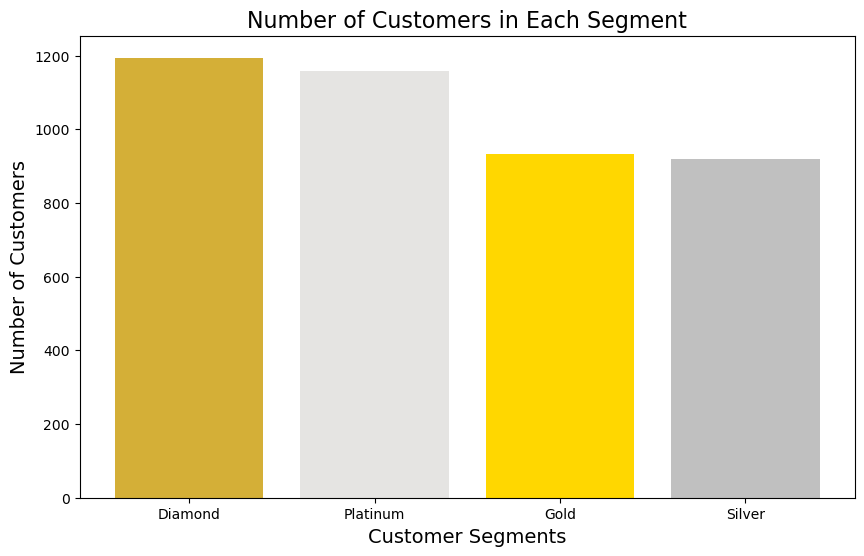

In [85]:
customer_segments = rfm['Loyalty level'].value_counts().sort_index()

segments = customer_segments.index
counts = customer_segments.values

plt.figure(figsize=(10, 6))
plt.bar(segments, counts, color=['#D4AF37', '#E5E4E2', '#FFD700', '#C0C0C0'])

plt.title('Number of Customers in Each Segment', fontsize=16)
plt.xlabel('Customer Segments', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)

plt.show()

In [79]:
print("Best Customers: ",len(rfm[rfm['RFMgroup']=='444']))
print('Loyal Customers: ',len(rfm[rfm['Frequency']==4]))
print("Big Spenders: ",len(rfm[rfm['M']==4]))
print('Almost Lost: ', len(rfm[rfm['RFMgroup']=='244']))
print('Lost Customers: ',len(rfm[rfm['RFMgroup']=='144']))
print('Lost Cheap Customers: ',len(rfm[rfm['RFMgroup']=='111']))

Best Customers:  416
Loyal Customers:  380
Big Spenders:  1051
Almost Lost:  150
Lost Customers:  61
Lost Cheap Customers:  477


## Suggestions

#### Best Customers
•	Reward Loyalty: Exclusive perks and loyalty programs.

•	Personalized Recommendations: Tailored product suggestions.


#### Loyal Customers
•	Loyalty Programs: Points systems or tiered rewards.

•	Referral Programs: Incentives for referrals.

•	Customer Feedback: Collect opinions and show appreciation.

#### Big Spenders 

•	Exclusive Offers: High-value promotions and bundles.

•	Upsell and Cross-sell: Complementary product suggestions.

#### Almost Lost 
•	Win-Back Campaigns: Re-engagement emails with special offers.

•	Surveys: Understand reasons for inactivity.

•	Limited-Time Offers: Time-sensitive promotions.

#### Lost Customers
•	Reactivation Campaigns: Significant discounts to re-engage.

•	Feedback Requests: Understand why they left.

•	Exit Offers: Attractive final purchase incentives.

#### Lost Cheap Customers

•	Cost-Effective Re-Engagement: Low-cost email marketing.

•	Incentivized Offers: Small discounts or free shipping.
